# Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

/home/pratik/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


# Reading the data

In [2]:
df = pd.read_csv('house_price.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# shape of the data
df.shape

(21613, 21)

In [4]:
df.size

453873

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#### Observation
* Maximum bedrooms are 33 in a house, huge house
* Maximum bathroors are 8, again indicating a huge house whereas minimum is 0, huge difference
* square feet maximum - 13540 sqft and minimum is 290 sqft
* Some house also have waterfront
* year build - Some house are very old dating back to 1900 and some are very new in 2015
* Some house are not even renovated and some are very recently renovated

In [6]:
df['bedrooms'].isnull().sum()

0

<Axes: >

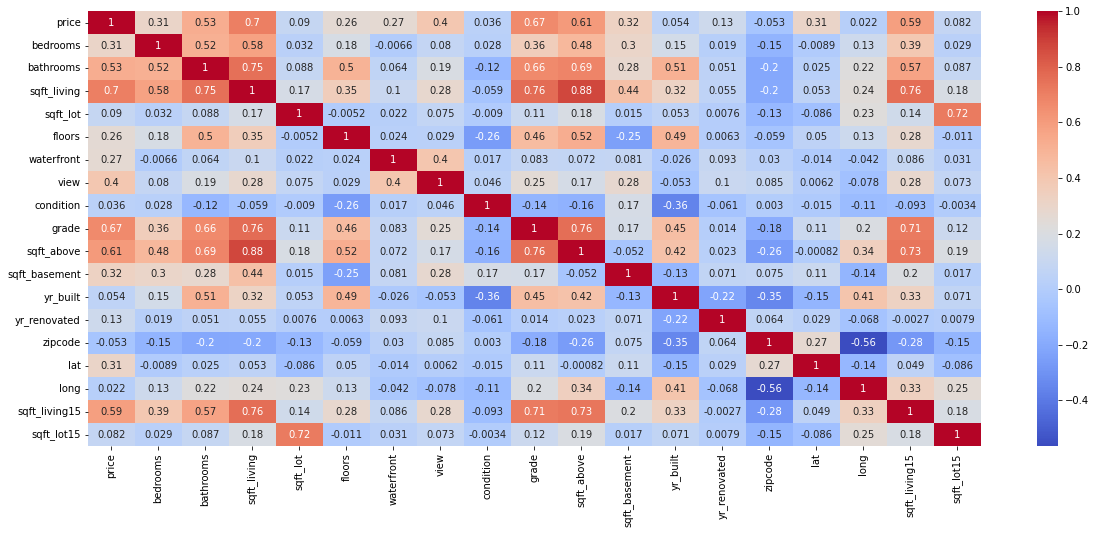

In [7]:
plt.figure(figsize = (20, 8))
sns.heatmap(df.drop(columns = ['id', 'date']).corr(), annot=True, cmap='coolwarm')

# plot for different type of bedrooms

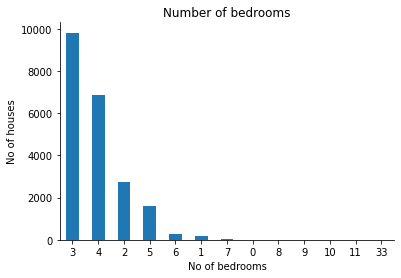

In [8]:
df['bedrooms'].value_counts().plot(kind = 'bar')

plt.xticks(rotation = 'horizontal')
plt.xlabel('No of bedrooms')
plt.ylabel('No of houses')
plt.title('Number of bedrooms')
sns.despine()

In [9]:
df[df['bedrooms'] == 33].shape

(1, 21)

In [10]:
for i in range(12):
    print(f"no of bedrooms - {i} - no of houses - {df[df['bedrooms'] == i].shape[0]}")

no of bedrooms - 0 - no of houses - 13
no of bedrooms - 1 - no of houses - 199
no of bedrooms - 2 - no of houses - 2760
no of bedrooms - 3 - no of houses - 9824
no of bedrooms - 4 - no of houses - 6882
no of bedrooms - 5 - no of houses - 1601
no of bedrooms - 6 - no of houses - 272
no of bedrooms - 7 - no of houses - 38
no of bedrooms - 8 - no of houses - 13
no of bedrooms - 9 - no of houses - 6
no of bedrooms - 10 - no of houses - 3
no of bedrooms - 11 - no of houses - 1


#### Observation
* Most of the houses have 3 bedrooms
* houses having 2-5 bedrooms are more
* Outside this range very minimal house
* only one house in the dataset has 33 bedrooms 

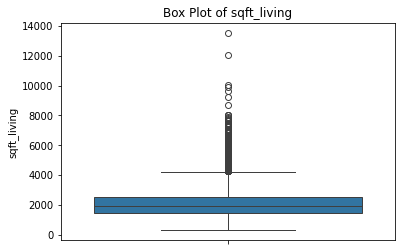

In [12]:
import seaborn as sns
sns.boxplot(data = df, y = 'sqft_living').set(title="Box Plot of sqft_living")
plt.show()

In [13]:
lower_limit, upper_limit = np.percentile(a = df['sqft_living'], q = [0.5,99.5])
print(upper_limit)
print(lower_limit)

df1 = df[(df['sqft_living']>lower_limit) & (df['sqft_living']<upper_limit)]

5583.159999999982
670.0


<Figure size 576x288 with 0 Axes>

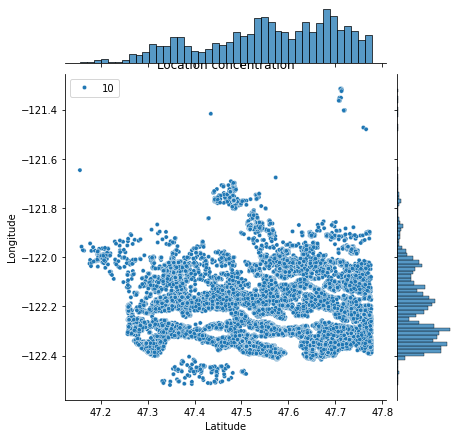

In [14]:
plt.figure(figsize = (8, 4))
sns.jointplot(x = df['lat'].values, y = df['long'].values, size = 10)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Location concentration')
plt.show()

# Observation 
* on longitude, there are very few above -121.8
* most of them are concentrated below -122.0 to -122.4
* on latitude after 47.3 there is more concentration of points
* This tells us that houses are bought in this location a lot, favourable location for selling a house

# Bivariate analysis

#### Price v square foot living

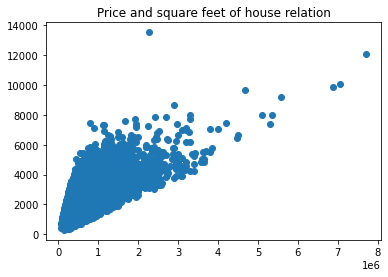

In [11]:
plt.scatter(df['price'], df['sqft_living'])

plt.title('Price and square feet of house relation')
plt.show()

In [12]:
# checking for specific range of square foot living between 2000 and 8000
df[(df['sqft_living'] > 2000) & (df['sqft_living'] < 8000)][['price', 'bedrooms', 'sqft_living', 'lat', 'long']].sort_values(by = 'sqft_living')

,price,bedrooms,sqft_living,lat,long
2100,491000.0,3,2005,47.6039,-122.298
14843,305950.0,4,2007,47.3301,-122.191
12714,460000.0,5,2008,47.5376,-122.292
20983,303210.0,4,2009,47.2577,-122.198
20359,279000.0,4,2009,47.2586,-122.200
...,...,...,...,...,...
14032,1680000.0,4,7620,47.5571,-122.140
18477,3300000.0,8,7710,47.6263,-122.314
16773,1920000.0,5,7730,47.7615,-122.084
19858,2700000.0,4,7850,47.5406,-121.982


In [13]:
# There are very few which have more than 8000 sqft
df[df['sqft_living'] > 8000][['price', 'bedrooms', 'sqft_living', 'lat', 'long']].sort_values(by = 'sqft_living')

,price,bedrooms,sqft_living,lat,long
1164,5110800.0,5,8010,47.6767,-122.211
18302,3300000.0,5,8020,47.5675,-122.189
14556,2888000.0,5,8670,47.7295,-122.372
4411,5570000.0,5,9200,47.6289,-122.233
8092,4668000.0,5,9640,47.5570,-122.210
9254,6885000.0,6,9890,47.6305,-122.240
3914,7062500.0,5,10040,47.6500,-122.214
7252,7700000.0,6,12050,47.6298,-122.323
12777,2280000.0,7,13540,47.6675,-121.986


# Price v latitude

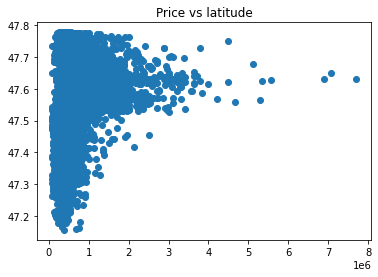

In [14]:
plt.scatter(df['price'], df['lat'])
plt.title('Price vs latitude')
plt.show()

# Price v longitude

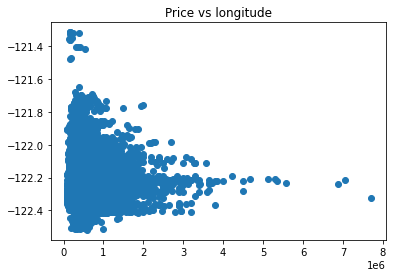

In [15]:
plt.scatter(df['price'], df['long'])
plt.title('Price vs longitude')
plt.show()

# Price v bedrooms

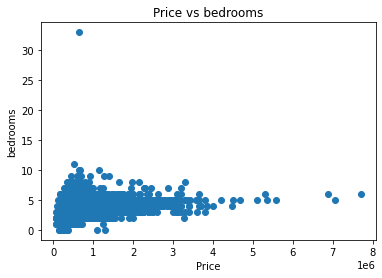

In [16]:
plt.scatter(df['price'], df['bedrooms'])

plt.xlabel('Price')
plt.ylabel('bedrooms')
plt.title('Price vs bedrooms')
plt.show()

# Price v square feet basement

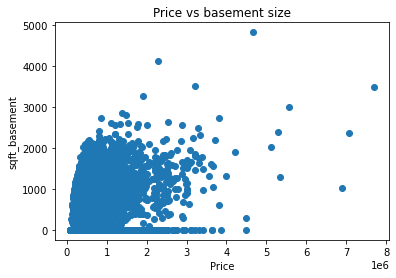

In [17]:
plt.scatter(df['price'], df['sqft_basement'])

plt.xlabel('Price')
plt.ylabel('sqft_basement')
plt.title('Price vs basement size')
plt.show()

In [18]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# Price v zipcode

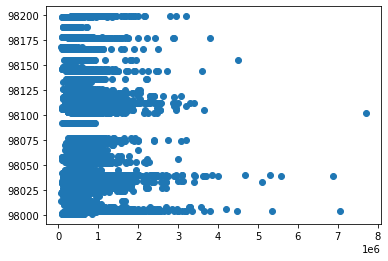

In [19]:
plt.scatter(df['price'], df['zipcode'])

# Price year built

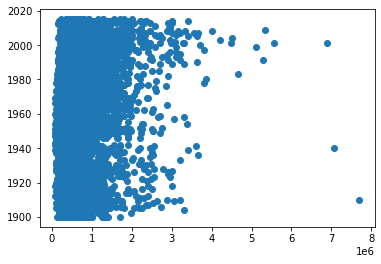

In [20]:
plt.scatter(df['price'], df['yr_built'])

<AxesSubplot:>

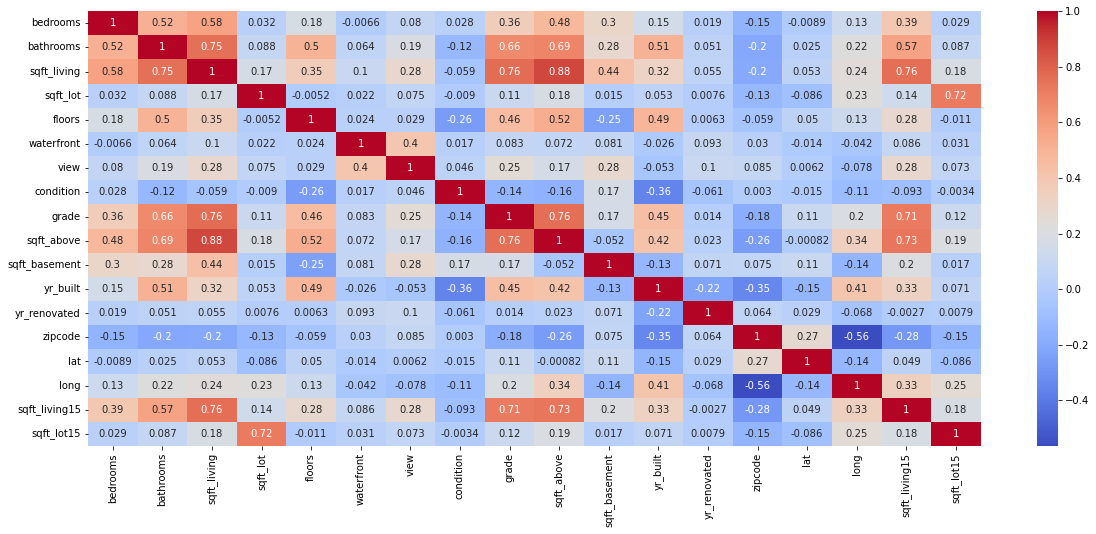

In [23]:
df2 = df.drop(['id', 'price', 'date'], axis = 1)

plt.figure(figsize = (20, 8))
sns.heatmap(df2.corr(), annot = True, cmap = 'coolwarm') 

# Applying Linear regression
#### some assumptions for applying linear regression, for now, ignoring this
1] Linear relationship

- linear regression needs the relationship between the independent and dependent variables to be linear.

2] No or little multicollinearity

- Multicollinearity occurs when the independent variables are too highly correlated with each other.

3] Homoscedasticity

- a condition in which the variance of the residual, or error term, in a regression model is constant

# Getting X and y values

# Splitting the data into training and test set
* commonly test set is given 20% of data and 80% data is for training the model

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [50]:
X = df.drop(['id', 'price', 'date'],axis=1)
y = df['price']

In [18]:
def split(x, y, size):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = size, random_state = 1)
    return x_train, x_test, y_train, y_test

def train_model(x, y, size, algo):
    data = split(x, y, size)
    model = algo()
    model.fit(data[0], data[2])
    y_pred = model.predict(data[1])
    return eval_metrics(data[3], y_pred), model
    
def eval_metrics(y_true, y_pred):
    MAE = mean_absolute_error(y_true, y_pred)
    MSE = mean_squared_error(y_true, y_pred)
    R2 = r2_score(y_true, y_pred)
    metrics = {'MAE' : MAE, 'MSE' : MSE, 'R2' : R2}
    return metrics

# Model performance with all columns

#### Random forest for data with all columns

In [245]:
random_forest_all = train_model(X, y, 0.2, RandomForestRegressor)
print(random_forest_all)

({'MAE': 0.2603862347944632, 'MSE': 0.25684289084477596, 'R2': 0.7994432257717561}, RandomForestRegressor())


#### XGB Regressor for data with all columns

In [119]:
xgb_all = train_model(X, y, 0.2, XGBRegressor)
print(xgb_all)

({'MAE': 70465.63167938932, 'MSE': 22827580896.27172, 'R2': 0.867743612593945}, XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...))


#### Gradient Boosting for data with all columns

In [115]:
gbr_all = train_model(X, y, 0.2, GradientBoostingRegressor)
print(gbr_all)

{'MAE': 80301.80974456083, 'MSE': 24377787051.930756, 'R2': 0.8587621674371532}


In [120]:
# feature importance of xgb as its r2 is better 
xgb_imp_feat = pd.DataFrame({'importance' : xgb_all[1].feature_importances_}, index = x_train1.columns)
xgb_imp_feat.sort_values(by = 'importance', ascending = False).head(7)

,importance
grade,0.442060
waterfront,0.212650
sqft_living,0.102667
lat,0.068367
view,0.041771
long,0.035963
sqft_living15,0.016577


# Model performance with selected columns

#### Random Forest Regressor for data with all columns (these columns are from XGB feature importance)

In [68]:
X2 = df[['grade', 'sqft_living', 'lat', 'long', 'sqft_living15', 'view', 'waterfront']]
y2 = df['price']

In [69]:
rfr_few = train_model(X2, y2, 0.2, RandomForestRegressor)
print(rfr_few[0])

{'MAE': 76987.15806899236, 'MSE': 24313303363.49379, 'R2': 0.8591357672381151}


#### XGB Regressor for data with all columns (these columns are from XGB feature importance)

In [70]:
xgb_few = train_model(X2, y2, 0.2, XGBRegressor)
xgb_few[0]

{'MAE': 74675.71892349063, 'MSE': 23988805983.907154, 'R2': 0.8610158110036754}

#### Gradient Boosting Regressor for data with all columns (these columns are from XGB feature importance)

In [124]:
gbr_few = train_model(X2, y2, 0.2, GradientBoostingRegressor)
print(gbr_few[0])

{'MAE': 83967.89967242823, 'MSE': 25335430291.452667, 'R2': 0.8532138600690393}


# Voting regressor (I used XGBoost and Random Forest Regressor)

In [74]:
x_train1, x_test1, y_train1, y_test1 = split(X2, y2, 0.2)

In [75]:
from sklearn.ensemble import VotingRegressor
vr = VotingRegressor([('xgb', xgb), ('rfr', rfr)])

In [76]:
vr.fit(x_train1, y_train1)

VotingRegressor(estimators=[('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=5,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=550,
                                          n_jobs=None, num_parallel_tree=None,
                                          random_state=None, ...)),
                            ('rfr', RandomForestRegressor(max_depth=19))])

In [77]:
y_pred = vr.predict(x_test1)
print(r2_score(y_test1, y_pred))

0.8681847418639088


# Why we do cross-validation ?
* estimate skills of model on unseen data
* it use =s limited sample
* goal is to see how model is performing on different unseen samples
* it is also used to see if the model is suffering from overfitting

# here we are using k-fold CV
* k's value = this many models will be created with different set of samples
* total 10 models will have 10 value as accuracy and a mean value of these value will be taken

In [151]:
def kfold(model, x, y, num_kfold):
    kfold_validation = KFold(num_kfold)
    score = cross_val_score(model, x, y, cv = kfold_validation)
    return f'Average accuracy of {num_kfold} folds = {round(np.mean(score)*100, 2)}%'

In [152]:
xgb_score = kfold(xgb_few[1], x_train1, y_train1, 10)
print(xgb_score)

Average accuracy of 10 folds = 87.67%


In [153]:
rfr_score = kfold(rfr_few[1], x_train1, y_train1, 10)
print(rfr_score)

Average accuracy of 10 folds = 87.12%


In [154]:
vr_score = kfold(vr, x_train1, y_train1, 10)
print(vr_score)

Average accuracy of 10 folds = 88.22%


In [166]:
x_test1.head(2)

,grade,sqft_living,lat,long,sqft_living15,view,waterfront
15544,9,2790,47.4362,-122.109,2900,0,0
17454,7,1630,47.7275,-122.232,1620,0,0


In [167]:
y2.loc[17454]

445000.0

In [168]:
a = np.array([[7, 1630, 47.7275, -122.232, 1620, 0, 0]]).reshape(1, -1)
xgb_few[1].predict(a)

array([413014.88], dtype=float32)

In [169]:
vr.predict(a)

array([416548.9375])

In [170]:
rfr_few[1].predict(a)

array([406618.5])

In [172]:
data = x_test1.copy()
data['y_true'] = y_test1

In [173]:
data['vr_pred'] = vr.predict(x_test1)

In [175]:
data['xgb_pred'] = xgb_few[1].predict(x_test1)
data['rfr_pred'] = rfr_few[1].predict(x_test1)

In [180]:
data.head()

,grade,sqft_living,lat,long,sqft_living15,view,waterfront,y_true,vr_pred,xgb_pred,rfr_pred
15544,9,2790,47.4362,-122.109,2900,0,0,459000.0,470205.578125,492838.15625,450719.30
17454,7,1630,47.7275,-122.232,1620,0,0,445000.0,416548.937500,413014.87500,406618.50
21548,11,2370,47.4543,-121.778,3860,0,0,1057000.0,619196.592500,554817.62500,715714.54
3427,9,2270,47.6612,-122.148,2450,0,0,732350.0,724620.996250,700885.31250,749836.70
8809,6,1430,47.4783,-122.265,1290,0,0,235000.0,242558.394345,239614.31250,252926.50


In [66]:
import pickle
pickle_out = open("random_forest.pkl","wb")
pickle.dump(rfr_few[1], pickle_out)
pickle_out.close()

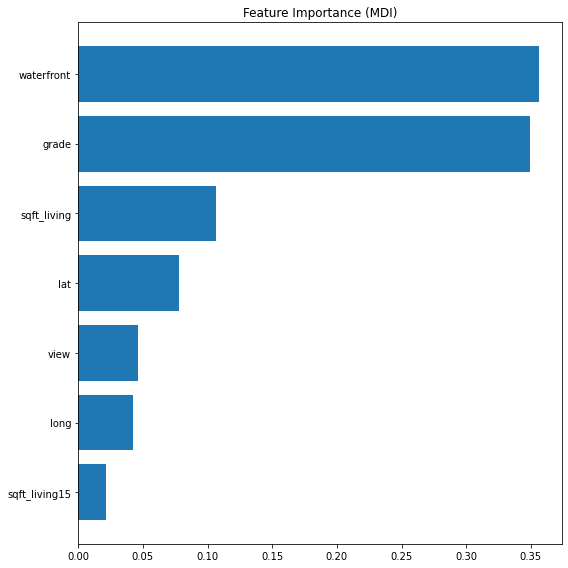

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
#
# Get Feature importance data using feature_importances_ attribute
#
feature_importance = xgb_few[1].feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(8, 8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X2.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')
result = permutation_importance(xgb_few[1], x_test1, y_test1, n_repeats = 10,
                                random_state = 42, n_jobs = 2)
sorted_idx = result.importances_mean.argsort()
fig.tight_layout()
plt.show()

# Observations :
----------------
* Tried linear models (linear regression and ElasticNet) but it did not give good result.
* Reason I believe might be - collinearity between independent variables and also some outliers.
* For tree models, results are very good.
* Even after tuning parameters results were same so, went with default parameters.
* Random Forest, XGB, Gradient Boost performed well but training time is good for XGBoost.
* Also used Voting Regressor with XGBoost and Random Forest Regressor, it also gave similar results but took more training time.
* About Scaling - with scaling the results were not very good so, did not use scaling.
* Also tried removing outliers (which I found by plotting bar plot) but the results were same.